# Projet data mining  
#### Sujet : Triage des patients aux urgences
###### BUT SD 23-24

Algassimou DIALLO

### Packages

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

### Transformation données R.data en dataframe pandas

Pyreader met beaucoup trop de temps à transformer les données 
Du coup on sauvegarde les données en csv après les avoir transfomées en dataframe puis on les recharge avec pd_read_csv.

In [4]:
#import pyreadr

In [5]:
#result = pyreadr.read_r('5v_cleandf.rdata')

#data = result["df"] 

In [6]:
#data.to_csv("data.csv")

## Data prep

In [7]:
data = pd.read_csv("data.csv", index_col=0)

In [10]:
data.head(10)

,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,B,4.0,40.0,Male,Hispanic or Latino,White or Caucasian,English,None,Single,Full Time,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B,4.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,3.0,84.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,A,3.0,86.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,A,3.0,86.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,A,4.0,87.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,B,2.0,75.0,Male,Non-Hispanic,White or Caucasian,English,None,Married,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,B,2.0,75.0,Male,Non-Hispanic,White or Caucasian,English,None,Married,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data.tail(10)

,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
560476,B,4.0,21.0,Male,Hispanic or Latino,Other,Other,None,Single,Not Employed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560477,A,2.0,49.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560478,A,3.0,49.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560479,A,3.0,49.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560480,A,3.0,49.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560481,A,2.0,49.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560482,A,3.0,50.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560483,A,3.0,50.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560484,A,3.0,50.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560485,A,3.0,50.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
data.describe()

,esi,age,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,acutemi,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
count,558029.000000,560475.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,...,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000
mean,3.012385,49.876765,0.002155,0.030634,0.014807,0.000023,0.005179,0.009968,0.051054,0.035844,...,0.001298,0.000717,0.013085,0.001052,0.001165,0.004219,0.002863,0.001233,0.001393,0.002518
std,0.869106,20.417029,0.046375,0.172324,0.120779,0.004816,0.071782,0.099342,0.220108,0.185901,...,0.036001,0.026900,0.113638,0.032475,0.034113,0.064820,0.053426,0.035095,0.037293,0.050156
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,108.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


## Exploratory Data Analysis 

- Variable cible "disposition"

On constate que 70% des visites des patients à l'ER ont fini par un discharge et seul 30% des visites ont fini par une admission.

In [25]:
data.groupby("disposition")["disposition"].count()/len(data["disposition"])

disposition
Admit        0.29731
Discharge    0.70269
Name: disposition, dtype: float64

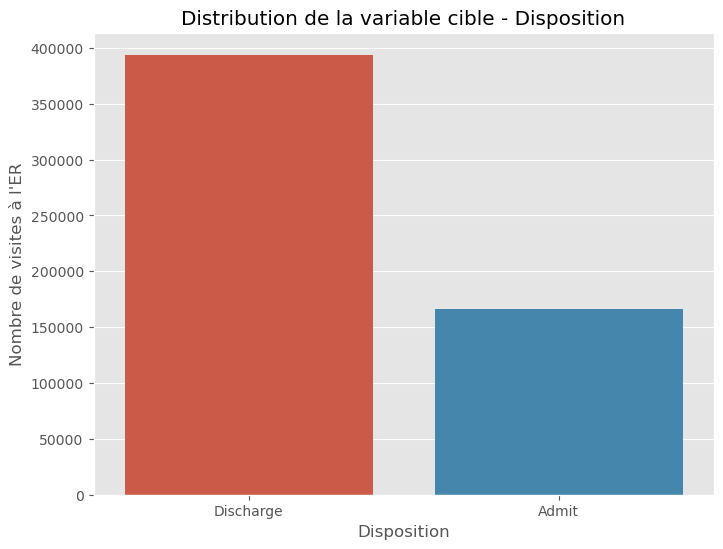

In [71]:
plt.figure(figsize=(8, 6))
sns.countplot(x='disposition', data=data)
plt.title('Distribution de la variable cible - Disposition')
plt.xlabel('Disposition')
plt.ylabel('Nombre de visites à l\'ER')
plt.show()

Pour simplifier l'EDA nous allons diviser le dataset selon les catégories des variables dans la doc.
Nous rajoutons la variable cible "disposition" dans chaque catégorie pour l'étude.

![My Image](categories.png)

On choisit pour le moment d'étudier **le triage des patients**.
On commence par les deux catégories qui semblent les plus intéressantes pour l'EDA: **Demographics et Triage evalution** avant de s'attaquer au **Chief complaint**(*on rajoute la variable ESI pour cette catégorie*).

In [116]:
demo = data[["disposition","age","gender","ethnicity","race","lang","religion","maritalstatus","employstatus","insurance_status"]]
trieval = data[["disposition","dep_name","arrivalmode","arrivalmonth","arrivalday","arrivalhour_bin","triage_vital_hr","triage_vital_sbp","triage_vital_dbp","triage_vital_rr","triage_vital_o2","triage_vital_o2_device","triage_vital_temp","esi"]]
chief_comp= data[["esi", "disposition","cc_abdominaldistention","cc_abdominalpain","cc_abdominalpainpregnant","cc_abnormallab","cc_abscess","cc_addictionproblem","cc_agitation","cc_alcoholintoxication","cc_alcoholproblem","cc_allergicreaction","cc_alteredmentalstatus","cc_animalbite","cc_ankleinjury","cc_anklepain","cc_anxiety","cc_arminjury","cc_armpain","cc_armswelling","cc_assaultvictim"]]

### Demographics

In [156]:
demo.head()

,disposition,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,insurance_status
0,Discharge,40.0,Male,Hispanic or Latino,White or Caucasian,English,None,Single,Full Time,Other
1,Discharge,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial
2,Discharge,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial
3,Discharge,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial
4,Admit,84.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare


In [168]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560486 entries, 0 to 560485
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   disposition       560486 non-null  object 
 1   age               560475 non-null  float64
 2   gender            560486 non-null  object 
 3   ethnicity         560486 non-null  object 
 4   race              560460 non-null  object 
 5   lang              560486 non-null  object 
 6   religion          560486 non-null  object 
 7   maritalstatus     560486 non-null  object 
 8   employstatus      560486 non-null  object 
 9   insurance_status  560486 non-null  object 
dtypes: float64(1), object(9)
memory usage: 47.0+ MB


Nous remarquons quelques valeurs manquantes pour l'âge et la race.
- l'âge est une variable très importante et sensible(voir graphiqe ci-dessous)donc on ne peut pas simplement les remplacer par une moyenne ou une mediane.
- la race est une variable qui n'influence pas trop(voir graphique ci-dessous) on peut donc les remplacer par une valeur ou tout simplement supprimer ces lignes. 

Pour le moment on décide de ne rien faire, on décidera de la méthode à adopter lors du choix des modèles.

In [167]:
demo.isna().sum()

disposition          0
age                 11
gender               0
ethnicity            0
race                26
lang                 0
religion             0
maritalstatus        0
employstatus         0
insurance_status     0
dtype: int64

In [46]:
demo.ethnicity.unique()

array(['Hispanic or Latino', 'Non-Hispanic', 'Patient Refused', 'Unknown'],
      dtype=object)

In [68]:
demo.race.unique()

array(['White or Caucasian', 'Native Hawaiian or Other Pacific Islander',
       'Other', 'Black or African American', 'Patient Refused', 'Asian',
       'Unknown', 'American Indian or Alaska Native', nan], dtype=object)

#### Distribution de l'âge

On remarque une nette différence dans la distrution de l'admission des patients en ER selon l'âge.
- Les "jeunes"(18-35 ans) sont majoritairement en "discharge".
- Ceux qui sont le plus admis sont les personnes agées de +50 ans.

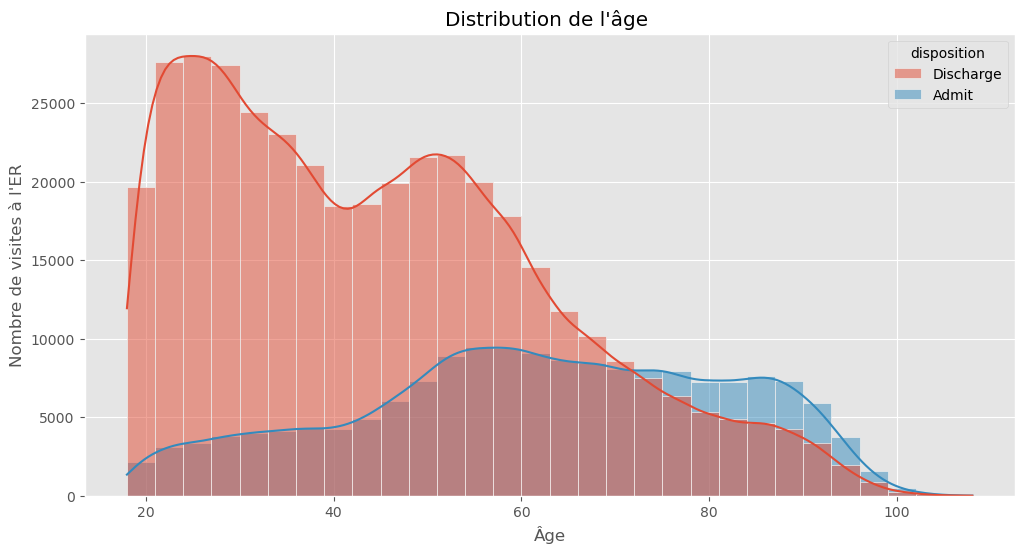

In [149]:
plt.figure(figsize=(12, 6))
sns.histplot(x='age', hue='disposition', data=demo, kde=True, bins=30)
plt.title('Distribution de l\'âge ')
plt.xlabel('Âge')
plt.ylabel('Nombre de visites à l\'ER')
plt.show()


In [150]:
age_stats = demo.groupby('disposition')['age'].agg(['mean', 'std'])
print("Moyenne et écart-type de l'âge en fonction de la disposition :\n", age_stats)


Moyenne et écart-type de l'âge en fonction de la disposition :
                   mean        std
disposition                      
Admit        61.590443  19.699300
Discharge    44.920627  18.612371


#### Distribution du genre 

On ne remarque pas grand choses au niveau du genre . Les distributions sont très similaires.

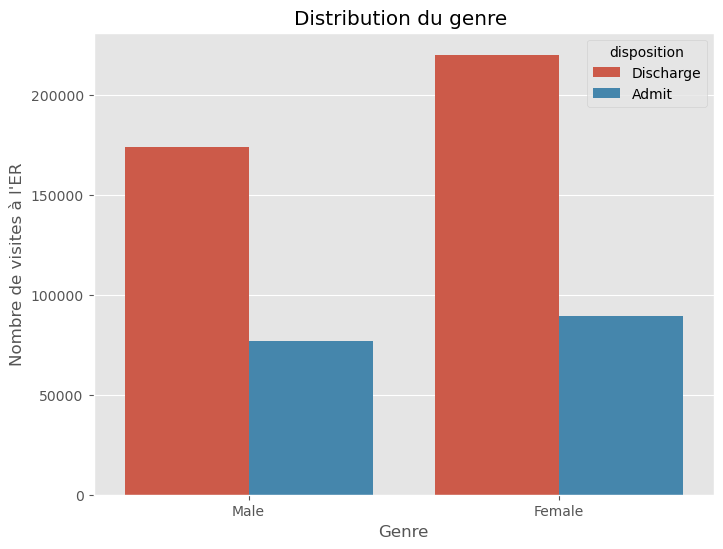

In [86]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='disposition', data=demo)
plt.title('Distribution du genre ')
plt.xlabel('Genre')
plt.ylabel('Nombre de visites à l\'ER')
plt.show()


#### Distribution de l'ethnicité en fonction de la disposition

Pareil pour l'ethnicité, malgré la grande différence du nombre de patients par ethnie, les distributions sont très semblables.


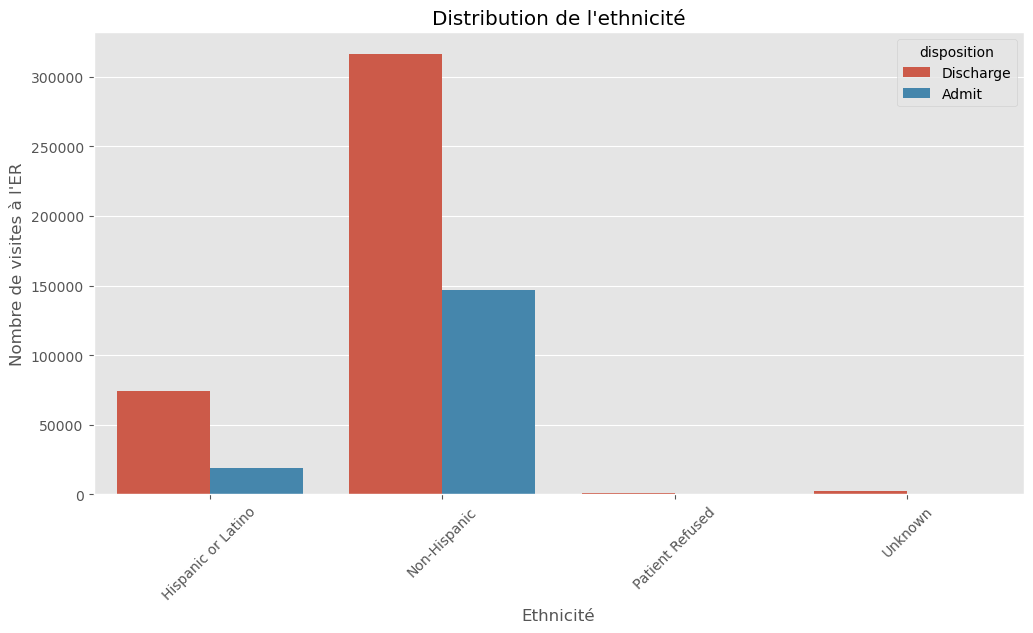

In [90]:
plt.figure(figsize=(12, 6))
sns.countplot(x='ethnicity', hue='disposition', data=demo)
plt.title('Distribution de l\'ethnicité')
plt.xlabel('Ethnicité')
plt.ylabel('Nombre de visites à l\'ER')
plt.xticks(rotation=45)
plt.show()

### Triage Evaluation

Maintenant interessons aux variables utilisés par les infirmiers pour effectuer le triage en particulcier le ESI attribuer aux patients

In [160]:
trieval.head()

,disposition,dep_name,arrivalmode,arrivalmonth,arrivalday,arrivalhour_bin,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2,triage_vital_o2_device,triage_vital_temp,esi
0,Discharge,B,Walk-in,June,Tuesday,23-02,63.0,146.0,85.0,18.0,97.0,0.0,97.0,4.0
1,Discharge,B,Car,January,Tuesday,15-18,83.0,125.0,77.0,16.0,NaN,0.0,98.0,4.0
2,Discharge,B,Walk-in,July,Thursday,11-14,78.0,134.0,78.0,16.0,97.0,NaN,97.8,2.0
3,Discharge,A,Car,July,Saturday,11-14,98.0,171.0,92.0,18.0,98.0,0.0,NaN,2.0
4,Admit,A,Walk-in,November,Tuesday,07-10,101.0,133.0,72.0,18.0,97.0,0.0,98.4,3.0


In [173]:
trieval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560486 entries, 0 to 560485
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   disposition             560486 non-null  object 
 1   dep_name                560486 non-null  object 
 2   arrivalmode             538602 non-null  object 
 3   arrivalmonth            560486 non-null  object 
 4   arrivalday              560486 non-null  object 
 5   arrivalhour_bin         560486 non-null  object 
 6   triage_vital_hr         394434 non-null  float64
 7   triage_vital_sbp        392582 non-null  float64
 8   triage_vital_dbp        392423 non-null  float64
 9   triage_vital_rr         389999 non-null  float64
 10  triage_vital_o2         289169 non-null  float64
 11  triage_vital_o2_device  333631 non-null  float64
 12  triage_vital_temp       377501 non-null  float64
 13  esi                     558029 non-null  float64
dtypes: float64(8), objec

Nous avons énormément de valeurs manquantes pour près de 70% des variables de cette catégorie.

Ces variables(*particulièrement les signes vitaux*) influencent beaucoup la valeur du ESI(*valeur qui influence aussi beaucoup la variable cible*) attribuée par l'infirmier aux patients. On ne peut donc pas supprimer ces valeurs ni les remplacer bêtement. Pareil que pour l'âge on décidera de la méthode à adopter lors du choix des modèles.

In [172]:
trieval.isna().sum()

disposition                    0
dep_name                       0
arrivalmode                21884
arrivalmonth                   0
arrivalday                     0
arrivalhour_bin                0
triage_vital_hr           166052
triage_vital_sbp          167904
triage_vital_dbp          168063
triage_vital_rr           170487
triage_vital_o2           271317
triage_vital_o2_device    226855
triage_vital_temp         182985
esi                         2457
dtype: int64

In [162]:
trieval.describe()

,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2,triage_vital_o2_device,triage_vital_temp,esi
count,394434.000000,392582.000000,392423.000000,389999.000000,289169.000000,333631.000000,377501.000000,558029.000000
mean,85.593333,133.365059,80.486044,17.617040,97.266667,0.040599,98.084147,3.012385
std,16.717428,21.318966,13.867425,1.955679,1.933673,0.197359,0.783628,0.869106
min,30.000000,45.000000,25.000000,8.000000,60.000000,0.000000,90.000000,1.000000
25%,74.000000,119.000000,71.000000,16.000000,96.000000,0.000000,97.700000,2.000000
50%,84.000000,131.000000,80.000000,18.000000,98.000000,0.000000,98.000000,3.000000
75%,96.000000,145.000000,89.000000,18.000000,99.000000,0.000000,98.400000,4.000000
max,280.000000,312.000000,214.000000,69.000000,99.000000,1.000000,106.000000,5.000000


#### Distribution de l'ESI en fonction de la disposition

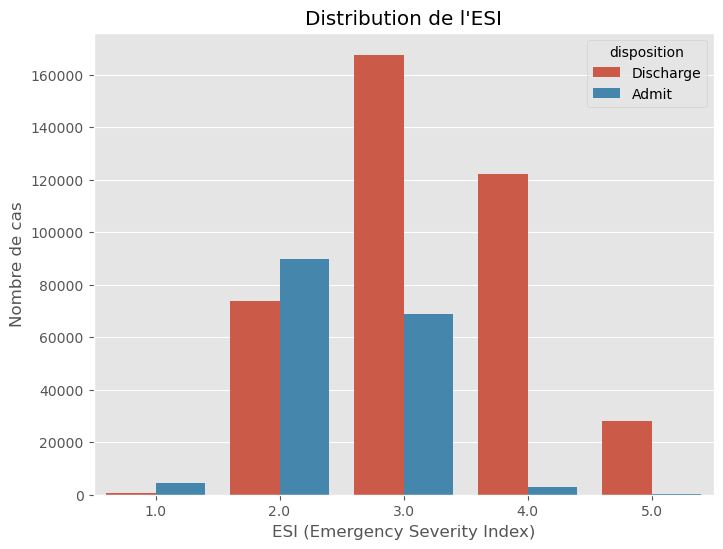

In [95]:
plt.figure(figsize=(8, 6))
sns.countplot(x='esi', hue='disposition', data=trieval)
plt.title('Distribution de l\'ESI')
plt.xlabel('ESI (Emergency Severity Index)')
plt.ylabel('Nombre de cas')
plt.show()

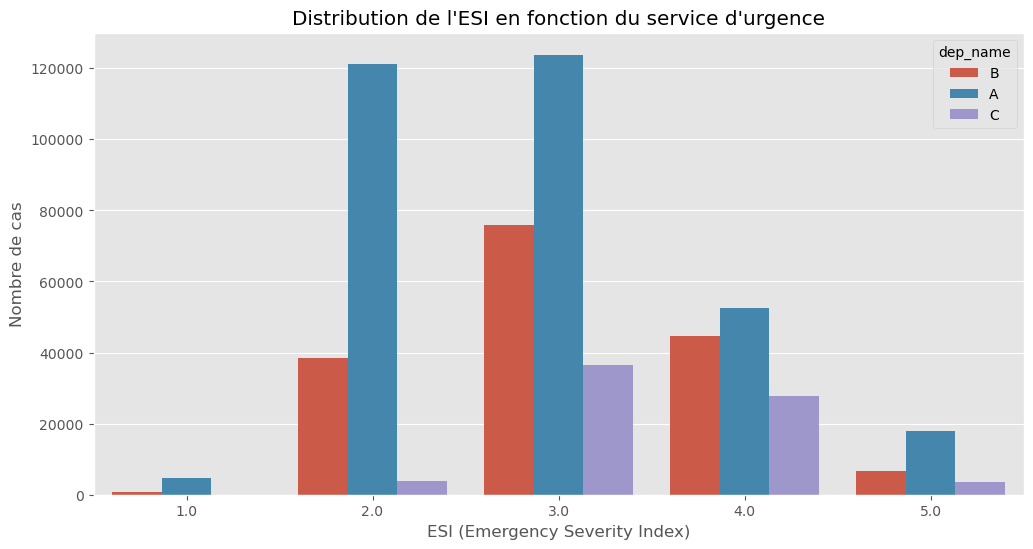

In [111]:
plt.figure(figsize=(12, 6))
sns.countplot(x='esi', hue='dep_name', data=trieval)
plt.title('Distribution de l\'ESI en fonction du service d\'urgence')
plt.xlabel('ESI (Emergency Severity Index)')
plt.ylabel('Nombre de cas')
plt.show()

#### Distribution de la disposition en fonction du moyen d'arriver à l'ER

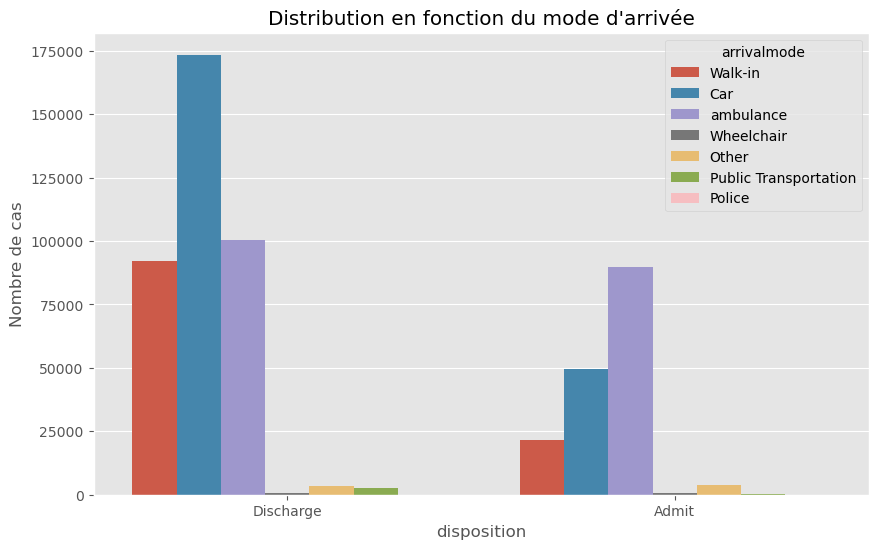

In [177]:
plt.figure(figsize=(10, 6))
sns.countplot(x='disposition', hue='arrivalmode', data=trieval)
plt.title('Distribution en fonction du mode d\'arrivée')
plt.ylabel('Nombre de cas')
plt.show()

In [178]:
# Distribution des signes_vitaux en fonction de l'ESI

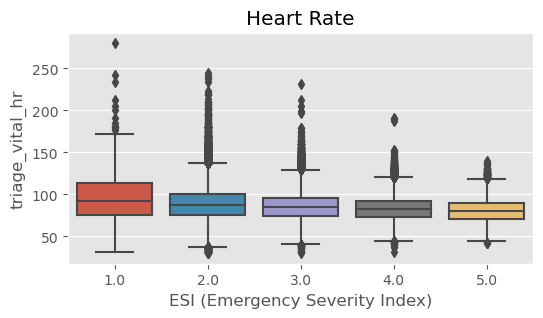

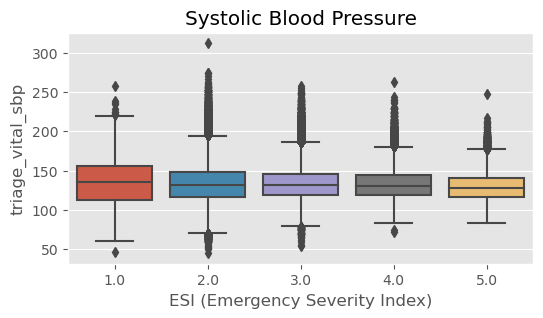

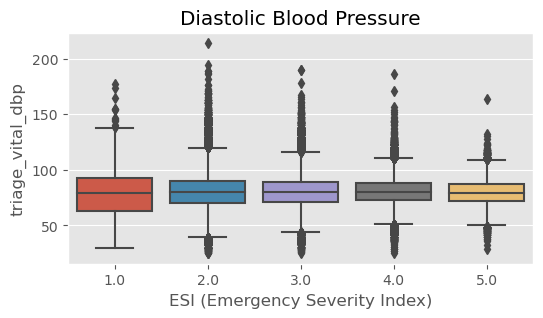

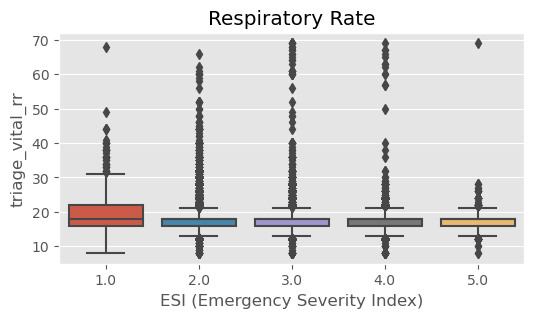

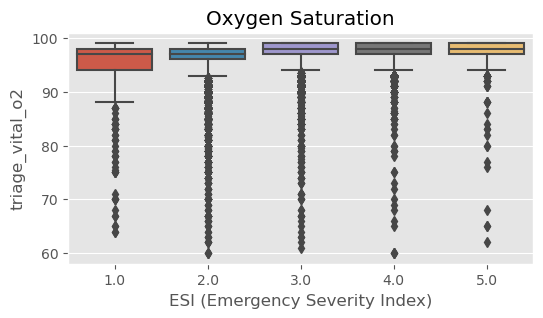

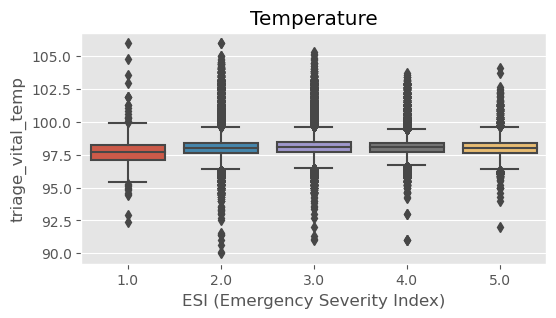

In [179]:
signes_vitaux = {
    'triage_vital_hr': 'Heart Rate',
    'triage_vital_sbp': 'Systolic Blood Pressure',
    'triage_vital_dbp': 'Diastolic Blood Pressure',
    'triage_vital_rr': 'Respiratory Rate',
    'triage_vital_o2': 'Oxygen Saturation',
    'triage_vital_temp': 'Temperature'
}


for var, description in signes_vitaux.items():
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='esi', y=var, data=trieval)
    plt.title(description)
    plt.xlabel('ESI (Emergency Severity Index)')
    plt.ylabel(var)
    plt.show()

### Chief Complaint

In [183]:
chief_comp.head()

,esi,disposition,cc_abdominaldistention,cc_abdominalpain,cc_abdominalpainpregnant,cc_abnormallab,cc_abscess,cc_addictionproblem,cc_agitation,cc_alcoholintoxication,...,cc_allergicreaction,cc_alteredmentalstatus,cc_animalbite,cc_ankleinjury,cc_anklepain,cc_anxiety,cc_arminjury,cc_armpain,cc_armswelling,cc_assaultvictim
0,4.0,Discharge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,Discharge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,Discharge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,Discharge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,Admit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
chief_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560486 entries, 0 to 560485
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   esi                       558029 non-null  float64
 1   disposition               560486 non-null  object 
 2   cc_abdominaldistention    557901 non-null  float64
 3   cc_abdominalpain          557901 non-null  float64
 4   cc_abdominalpainpregnant  557901 non-null  float64
 5   cc_abnormallab            557901 non-null  float64
 6   cc_abscess                557901 non-null  float64
 7   cc_addictionproblem       557901 non-null  float64
 8   cc_agitation              557901 non-null  float64
 9   cc_alcoholintoxication    557901 non-null  float64
 10  cc_alcoholproblem         557901 non-null  float64
 11  cc_allergicreaction       557901 non-null  float64
 12  cc_alteredmentalstatus    557901 non-null  float64
 13  cc_animalbite             557901 non-null  f

In [187]:
chief_comp.isna().sum()

esi                         2457
disposition                    0
cc_abdominaldistention      2585
cc_abdominalpain            2585
cc_abdominalpainpregnant    2585
cc_abnormallab              2585
cc_abscess                  2585
cc_addictionproblem         2585
cc_agitation                2585
cc_alcoholintoxication      2585
cc_alcoholproblem           2585
cc_allergicreaction         2585
cc_alteredmentalstatus      2585
cc_animalbite               2585
cc_ankleinjury              2585
cc_anklepain                2585
cc_anxiety                  2585
cc_arminjury                2585
cc_armpain                  2585
cc_armswelling              2585
cc_assaultvictim            2585
dtype: int64